In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from NBAData.features import *

### *basic outline:* team/player data -> assign rest days -> assign_postion (encode it) -> assign if starter (encode it) -> opp/team encode it -> prop features -> player prop matchup data

In [87]:
pd.set_option('display.max_columns', None)
s21 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_21_FEATURES.csv')

s22 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_22_FEATURES.csv')

s23 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_23_FEATURES.csv')

s24 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_24_FEATURES.csv')

s25 = pd.read_csv('PLAYOFF_DATA/PLAYOFFS_25_FEATURES.csv')


In [88]:
all_playoff_data = pd.concat([s21, s22, s23, s24, s25])
all_playoff_data['OPP_TEAM_ID'] = all_playoff_data['OPP_TEAM_ID'].astype(int)
all_playoff_data.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'MATCHUP_KEY'], inplace=True)

print(f"Data has {all_playoff_data.shape[0]} rows and {all_playoff_data.shape[1]} columns")
all_playoff_data.tail()

Data has 8901 rows and 102 columns


,PLAYER_NAME,PLAYER_ID,MATCHUP,TEAM_ABBREVIATION,TEAM_ID,OPP_ABBREVIATION,HOME_GAME,GAME_ID,GAME_DATE,WL,MIN,PTS,AST,REB,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,STL,BLK,TOV,PF,PLUS_MINUS,FANTASY_PTS,PointsPerShot,eFG,START_POSITION,OFF_RATING,DEF_RATING,NET_RATING,OREB_PCT,DREB_PCT,REB_PCT,AST_PCT,AST_TOV,USG_PCT,TS_PCT,E_PACE,PACE,PIE,PACE_PER40,TEAM_GAME_DATE,TEAM_MIN,TEAM_FGM,TEAM_FGA,TEAM_FG_PCT,TEAM_FG3M,TEAM_FG3A,TEAM_FG3_PCT,TEAM_FTM,TEAM_FTA,TEAM_FT_PCT,TEAM_OREB,TEAM_DREB,TEAM_REB,TEAM_AST,TEAM_STL,TEAM_BLK,TEAM_TOV,TEAM_PF,TEAM_PTS,OPP_DEF_RATING,OPP_STL,OPP_BLK,OPP_REB,OPP_FG_PCT,OPP_TEAM_ID,TEAM_OFF_RATING,TEAM_PACE,GAME_PACE,OPP_PACE,STARTING,USG_PCT_LAST_3,USG_PCT_LAST_5,USG_PCT_LAST_7,PTS_LAST_3,PTS_LAST_5,PTS_LAST_7,STD_PTS_LAST_3,STD_PTS_LAST_5,STD_PTS_LAST_7,PLAYER_HOME_AVG_PTS,PLAYER_AWAY_AVG_PTS,GUARD,FORWARD,CENTER,DAYS_OF_REST,GameInSeries,Series,MIN_LAST_2,MIN_LAST_4,MIN_LAST_6,FGA_LAST_2,FGA_LAST_4,FGA_LAST_6
1727,Quinten Post,1642366,GSW @ MIN,GSW,1610612744,MIN,0,42400231,2025-05-06,W,6,0,0,1,0,0,NaN,0,0,NaN,0,0,NaN,0,1,0,0,0,0,14,1.2,0.00,0.00,NaN,138.5,28.6,109.9,0.0,0.111,0.071,0.0,0.0,0.000,0.000,101.41,102.32,0.056,85.26,"MAY 06, 2025",240,34,87,0.391,18,42,0.429,13,15,0.867,18,33,51,26,10,2,12,18,99,113.013699,7.0,6.0,41.0,0.395349,1610612750,113.013699,87.60,92.54,97.48,0,0.05,0.14,0.14,1.67,4.6,5.29,2.89,5.32,5.35,NaN,3.40,0,0,1,2.0,1,1,4.5,10.25,14.67,0.0,2.5,4.67
1728,Quinten Post,1642366,GSW @ MIN,GSW,1610612744,MIN,0,42400232,2025-05-08,L,3,0,0,0,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,0,-13,0.0,0.00,0.00,C,0.0,216.7,-216.7,0.0,0.000,0.000,0.0,0.0,0.000,0.000,90.47,80.00,0.000,66.67,"MAY 08, 2025",240,34,76,0.447,9,32,0.281,16,25,0.640,10,32,42,23,8,2,17,16,93,98.936170,10.0,5.0,39.0,0.505747,1610612750,98.936170,94.00,95.40,96.80,1,0.00,0.08,0.12,0.00,2.0,3.57,0.00,2.74,4.72,NaN,2.83,0,0,1,2.0,2,1,4.5,7.50,10.67,0.0,1.5,3.50
1729,Quinten Post,1642366,GSW vs. MIN,GSW,1610612744,MIN,1,42400233,2025-05-10,L,3,0,0,0,0,0,NaN,0,0,NaN,0,0,NaN,0,0,0,0,0,1,-6,0.0,0.00,0.00,NaN,40.0,160.0,-120.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,94.22,95.36,-0.143,79.47,"MAY 10, 2025",240,35,81,0.432,10,23,0.435,17,21,0.810,12,24,36,21,6,7,14,24,97,105.160451,4.0,7.0,44.0,0.439024,1610612750,105.160451,92.24,94.24,96.24,0,0.00,0.03,0.10,0.00,1.0,3.29,0.00,2.24,4.89,5.0,NaN,0,0,1,2.0,3,1,3.0,3.75,7.83,0.0,0.0,1.67
1730,Quinten Post,1642366,GSW vs. MIN,GSW,1610612744,MIN,1,42400234,2025-05-12,L,5,5,1,2,2,4,0.50,1,2,0.50,0,0,NaN,1,1,0,0,0,1,14,8.9,1.25,1.25,NaN,146.2,38.5,107.7,0.2,0.250,0.222,0.2,0.0,0.286,0.625,132.19,134.68,0.257,112.23,"MAY 12, 2025",240,37,85,0.435,8,27,0.296,28,33,0.848,14,24,38,18,10,1,15,25,110,109.430959,9.0,5.0,38.0,0.493671,1610612750,109.430959,100.52,101.98,103.44,0,0.10,0.06,0.10,1.67,1.0,2.14,2.89,2.24,2.67,5.0,NaN,0,0,1,2.0,4,1,4.0,4.25,6.33,2.0,1.0,1.67
1731,Quinten Post,1642366,GSW @ MIN,GSW,1610612744,MIN,0,42400235,2025-05-14,L,10,3,0,3,1,4,0.25,1,4,0.25,0,0,NaN,0,3,0,0,2,1,9,4.6,0.75,0.75,NaN,127.3,86.4,40.9,0.0,0.333,0.158,0.0,0.0,0.231,0.375,100.25,106.24,0.000,88.53,"MAY 14, 2025",240,39,90,0.433,11,39,0.282,21,30,0.700,18,22,40,21,14,1,17,21,110,107.632094,11.0,4.0,39.0,0.628205,1610612750,107.632094,102.20,100.40,98.60,0,0.17,0.10,0.10,2.67,1.6,1.86,2.52,2.30,2.41,NaN,2.86,0,0,1,2.0,5,1,7.5,5.25,5.00,4.0,2.0,1.33


In [89]:
all_playoff_data.columns

Index(['PLAYER_NAME', 'PLAYER_ID', 'MATCHUP', 'TEAM_ABBREVIATION', 'TEAM_ID',
       'OPP_ABBREVIATION', 'HOME_GAME', 'GAME_ID', 'GAME_DATE', 'WL',
       ...
       'CENTER', 'DAYS_OF_REST', 'GameInSeries', 'Series', 'MIN_LAST_2',
       'MIN_LAST_4', 'MIN_LAST_6', 'FGA_LAST_2', 'FGA_LAST_4', 'FGA_LAST_6'],
      dtype='object', length=102)

### Features that will be used to train my XGBoost model

In [90]:
features = [
    'MIN','FGA', 'FTA', 'FG3A','FG_PCT', 'FT_PCT', 'FG3_PCT', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
    'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'PointsPerShot', 'eFG',
    'AST_PCT', 'AST_TOV','USG_PCT', 'TS_PCT','PACE',
    'TEAM_FGA', 'TEAM_FG3A','TEAM_FTA',
    'TEAM_AST', 'TEAM_REB', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF',
    'TEAM_OFF_RATING', 'TEAM_PACE', 
    #grab oppenents avgerages for the game
    'OPP_PACE', 'OPP_DEF_RATING',
    'OPP_STL', 'OPP_BLK', 'OPP_REB', 'OPP_FG_PCT',
    #rolling averages
    'USG_PCT_LAST_3', 'USG_PCT_LAST_5', 'USG_PCT_LAST_7',
    'PTS_LAST_3', 'PTS_LAST_5', 'PTS_LAST_7',
    'STD_PTS_LAST_3', 'STD_PTS_LAST_5', 'STD_PTS_LAST_7',
    'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS',
    'MIN_LAST_2', 'MIN_LAST_4', 'MIN_LAST_6',
    'FGA_LAST_2', 'FGA_LAST_4', 'FGA_LAST_6',
    #ill input these during prediction
    'GUARD', 'FORWARD', 'CENTER', 'STARTING', 'DAYS_OF_REST', 'HOME_GAME'
]

In [91]:
corr_matrix = all_playoff_data.corr(numeric_only=True)
target = corr_matrix['PTS'].sort_values(ascending=False).head(15)
target


PTS                    1.000000
FGM                    0.973306
FGA                    0.914799
FANTASY_PTS            0.912337
PLAYER_HOME_AVG_PTS    0.900719
PTS_LAST_3             0.898818
PLAYER_AWAY_AVG_PTS    0.895360
PTS_LAST_5             0.880468
PTS_LAST_7             0.873510
FGA_LAST_2             0.872741
FGA_LAST_4             0.847286
FGA_LAST_6             0.840639
MIN                    0.771297
MIN_LAST_2             0.747923
MIN_LAST_4             0.731585
Name: PTS, dtype: float64

## Train XGBoost model

In [92]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

X = all_playoff_data[features]
y = all_playoff_data['PTS']

all_playoff_data.sort_values(by='GAME_DATE', ascending=False, inplace=True)
weights = np.linspace(1,2,num=len(all_playoff_data))

X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(X, y, weights, test_size=0.2, random_state=42)

# XGBoost model
XGB_model = xgb.XGBRegressor(random_state=42)
XGB_model.fit(X_train, y_train, sample_weight=weights_train)
pred = XGB_model.predict(X_test)

print(f"R-squared: {round(r2_score(y_test, pred), 3)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, pred), 3)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, pred), 3)}")



R-squared: 0.996
Mean Absolute Error: 0.299
Mean Squared Error: 0.422


### How the model performed with existing data

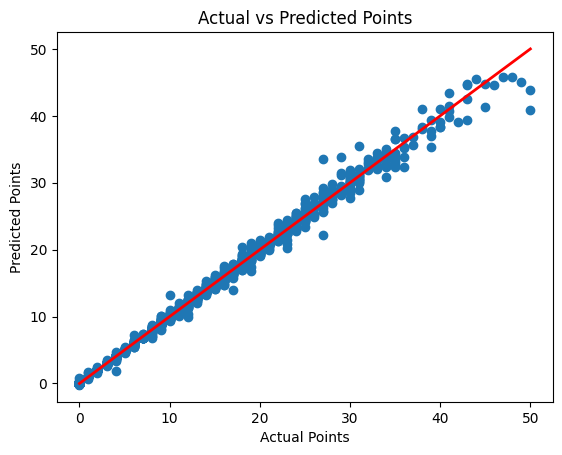

In [93]:
plt.scatter(y_test, pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Points')
plt.ylabel('Predicted Points')
plt.title('Actual vs Predicted Points')
plt.show()

### Check to see which features to keep and remove

In [94]:
import shap

XGB_model.fit(X, y)

# Create SHAP explainer
explainer = shap.TreeExplainer(XGB_model)
shap_values = explainer.shap_values(X)

# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(shap_values).mean(axis=0)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))


Top 15 Most Important Features:
                feature  importance
1                   FGA    5.851631
16        PointsPerShot    2.657966
2                   FTA    0.830678
43           PTS_LAST_3    0.592499
21               TS_PCT    0.416021
5                FT_PCT    0.103732
4                FG_PCT    0.095418
46       STD_PTS_LAST_3    0.045792
3                  FG3A    0.030541
48       STD_PTS_LAST_7    0.024041
6               FG3_PCT    0.022721
49  PLAYER_HOME_AVG_PTS    0.016320
52           MIN_LAST_4    0.016291
45           PTS_LAST_7    0.013796
44           PTS_LAST_5    0.013490


## Random Forest Model

In [99]:
from sklearn.ensemble import RandomForestRegressor

X = all_playoff_data[features]
y = all_playoff_data['PTS']

all_playoff_data.sort_values(by='GAME_DATE', ascending=False, inplace=True)
rf_weights = np.linspace(1,2,num=len(all_playoff_data))

X_train, X_test, y_train, y_test, rf_weights_train, rf_weights_test = train_test_split(X, y, rf_weights, test_size=0.2, random_state=42)

# XGBoost model
rf_model = RandomForestRegressor(n_estimators=150)
rf_model.fit(X_train, y_train, sample_weight=rf_weights_train)
pred = rf_model.predict(X_test)

print(f"R-squared: {round(r2_score(y_test, pred), 3)}")
print(f"Mean Absolute Error: {round(mean_absolute_error(y_test, pred), 3)}")
print(f"Mean Squared Error: {round(mean_squared_error(y_test, pred), 3)}")

R-squared: 0.995
Mean Absolute Error: 0.3
Mean Squared Error: 0.467


### Same features, but this includes name, opp, and game_date for my functions

In [101]:
avg_features = [
    'PLAYER_NAME','TEAM_ABBREVIATION','OPP_ABBREVIATION', 'GAME_DATE',
    'MIN','FGA', 'FTA', 'FG3A','FG_PCT', 'FT_PCT', 'FG3_PCT', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
    'OFF_RATING', 'DEF_RATING', 'NET_RATING', 'PointsPerShot', 'eFG',
    'AST_PCT', 'AST_TOV','USG_PCT', 'TS_PCT','PACE',
    'TEAM_FGA', 'TEAM_FG3A','TEAM_FTA',
    'TEAM_AST', 'TEAM_REB', 'TEAM_STL', 'TEAM_BLK', 'TEAM_TOV', 'TEAM_PF',
    'TEAM_OFF_RATING', 'TEAM_PACE', 
    #grab oppenents avgerages for the game
    'OPP_PACE', 'OPP_DEF_RATING',
    'OPP_STL', 'OPP_BLK', 'OPP_REB', 'OPP_FG_PCT',
    #rolling averages
    'USG_PCT_LAST_3', 'USG_PCT_LAST_5', 'USG_PCT_LAST_7',
    'PTS_LAST_3', 'PTS_LAST_5', 'PTS_LAST_7',
    'STD_PTS_LAST_3', 'STD_PTS_LAST_5', 'STD_PTS_LAST_7',
    'PLAYER_HOME_AVG_PTS', 'PLAYER_AWAY_AVG_PTS',
    'MIN_LAST_2', 'MIN_LAST_4', 'MIN_LAST_6',
    'FGA_LAST_2', 'FGA_LAST_4', 'FGA_LAST_6',
    #ill input these during prediction
    'GUARD', 'FORWARD', 'CENTER', 'STARTING', 'DAYS_OF_REST', 'HOME_GAME'
]

In [102]:
import requests # type: ignore
from datetime import datetime
import pytz # type: ignore

today = datetime.today().strftime('%Y-%m-%d')

def get_espn_games(date_str='20250613'):  # YYYYMMDD format
    url = f"http://site.api.espn.com/apis/site/v2/sports/basketball/nba/scoreboard?dates={date_str}"
    response = requests.get(url)
    data = response.json()
    
    # Define timezone objects
    utc = pytz.UTC
    pst = pytz.timezone('America/Los_Angeles')

    games_list = []
    for event in data['events']:
        # Parse UTC time from ESPN
        utc_time = datetime.strptime(event['date'], '%Y-%m-%dT%H:%MZ').replace(tzinfo=utc)
        # Convert to PST
        pst_time = utc_time.astimezone(pst)
        
        game_dict = {
            'game_date': pst_time.strftime('%Y-%m-%d'),
            'home_team': event['competitions'][0]['competitors'][0]['team']['abbreviation'],
            'away_team': event['competitions'][0]['competitors'][1]['team']['abbreviation'],
            'game_time': pst_time.strftime('%I:%M %p'),  # 12-hour format with AM/PM
            'venue': event['competitions'][0]['venue']['fullName']
        }
        games_list.append(game_dict)
    
    return games_list

def getPlayerAVG(player, data):
    player_data = data[data['PLAYER_NAME'] == player]
    exclude = ['PLAYER_NAME','TEAM_ABBREVIATION','OPP_ABBREVIATION','GAME_DATE','OPP_PACE','OPP_DEF_RATING','OPP_STL','OPP_BLK','OPP_REB','OPP_FG_PCT','HOME_GAME','STARTING',
    'USG_PCT_LAST_3','USG_PCT_LAST_5','USG_PCT_LAST_7','PTS_LAST_3','PTS_LAST_5','PTS_LAST_7','STD_PTS_LAST_3','STD_PTS_LAST_5','STD_PTS_LAST_7','PLAYER_HOME_AVG_PTS','PLAYER_AWAY_AVG_PTS','GUARD','FORWARD','CENTER',
    'DAYS_OF_REST', 'GameInSeries', 'Series','MIN_LAST_2', 'MIN_LAST_4', 'MIN_LAST_6','FGA_LAST_2', 'FGA_LAST_4', 'FGA_LAST_6',
]
    res = [round(player_data[col].mean(), 2) for col in avg_features if col not in exclude]
    return res

def getOppAVG(team, data):
    team_data = data[data['OPP_ABBREVIATION'] == team]
    
    include = ['OPP_DEF_RATING', 'OPP_STL',	'OPP_BLK','OPP_REB','OPP_FG_PCT','OPP_PACE']
    
    team_stats = team_data.groupby('GAME_DATE')[include].mean().reset_index()
    return [round(team_stats[col].mean(), 2) for col in include]

def getPlayerRollingAVG(player, data):
    player = data[data['PLAYER_NAME'] == player].copy()
    player.sort_values(by='GAME_DATE', inplace=True)
    res = []
    include = ['USG_PCT_LAST_3','USG_PCT_LAST_5','USG_PCT_LAST_7','PTS_LAST_3','PTS_LAST_5','PTS_LAST_7',
               'STD_PTS_LAST_3','STD_PTS_LAST_5','STD_PTS_LAST_7','PLAYER_HOME_AVG_PTS','PLAYER_AWAY_AVG_PTS',
               'MIN_LAST_2', 'MIN_LAST_4', 'MIN_LAST_6','FGA_LAST_2', 'FGA_LAST_4', 'FGA_LAST_6']
    for col in include:
        value = player[col].dropna().iloc[-1] if not player[col].dropna().empty else 0
        res.append(value)
    return res

def otherFeatures(player, data, rest_days, games):
    player = data[data['PLAYER_NAME'] == player].copy()
    player.sort_values(by='GAME_DATE', inplace=True)
    
    res = []
    res.append(player['GUARD'].iloc[-1])
    res.append(player['FORWARD'].iloc[-1])
    res.append(player['CENTER'].iloc[-1])
    res.append(player['STARTING'].iloc[-1])
    res.append(rest_days)
    for game in games:
        if game['home_team'] == player['TEAM_ABBREVIATION'].iloc[-1]:
            res.append(1)
        else:
            res.append(0)
    return res

def buildFeatureVector(player, opponent, rest_days, data, df, games):
    features = (getPlayerAVG(player, df) + 
                   getOppAVG(opponent, data) + 
                   getPlayerRollingAVG(player, df) + 
                   otherFeatures(player, df, rest_days, games))
    return features

def make_points_prediction(player_name, opponent, rest_days, model, data, df, games):
    try:
        features = buildFeatureVector(player_name, opponent, rest_days, data, df, games)
        X_pred = pd.DataFrame([features], columns=model.feature_names_in_)
        prediction = model.predict(X_pred)[0]
        return {
            'player': player_name,
            'opponent': opponent,
            'predicted_points': round(prediction),
        }
    except Exception as e:
        print(f"Error making prediction for {player_name}: {str(e)}")
        return None

def analyze_points_prop(prediction, prop_line):
    if not prediction:
        return None
    
    edge = round(float(prediction['predicted_points']) - prop_line, 1)
    
    res = {
        'player': prediction['player'],
        'opponent': prediction['opponent'],
        'predicted_points': prediction['predicted_points'],
        'prop_line': prop_line,
        'edge': edge,
        'recommendation': 'OVER' if edge > 0 else 'UNDER'
    }
    return pd.DataFrame([res])
    

### Use the xgboost model to predict there points and compare the there line

In [104]:
import pandas as pd
from datetime import datetime
from tqdm import tqdm  # Optional: for a progress bar

# Load data
propsData = pd.read_csv('PROPS_DATA/Playoffs_DFS(6_16_25).csv')
pp = propsData[(propsData['BOOKMAKER'] == 'PrizePicks') & (propsData['CATEGORY'] == 'player_points')]

# Only select needed columns
pp = pp[['NAME', 'LINE']].drop_duplicates()

# Cache games outside the loop
games_today = get_espn_games()
results = []

for name in tqdm(pp['NAME'].unique(), desc="Processing players"):
    try:
        # Filter player history
        player_df = s25[s25['PLAYER_NAME'] == name].sort_values(by='GAME_DATE')
        if player_df.empty:
            continue
        
        # Rest days
        last_game_date = pd.to_datetime(player_df['GAME_DATE'].iloc[-1])
        rest_days = (datetime.today() - last_game_date).days
        
        # Team info
        player_team = player_df['TEAM_ABBREVIATION'].iloc[-1]

        # Match opponent from today's games
        opponent = None
        for game in games_today:
            if game['home_team'] == player_team:
                opponent = game['away_team']
                break
            elif game['away_team'] == player_team:
                opponent = game['home_team']
                break
        if not opponent:
            continue  # Skip if no game match found

        # Line from prop dataset
        player_line = pp.loc[pp['NAME'] == name, 'LINE'].values[0]

        # Make prediction
        prediction = make_points_prediction(
            player_name=name,
            opponent=opponent,
            rest_days=rest_days,
            model=XGB_model,
            data=s25,
            df=s25,
            games=games_today
        )
        
        result_df = analyze_points_prop(prediction, player_line)
        if result_df is not None:
            results.append(result_df)
    except Exception as e:
        print(f"Error processing {name}: {e}")
        continue

# Combine all results
if results:
    final_results_df = pd.concat(results, ignore_index=True)
    display(final_results_df)
else:
    print("No results generated.")


Processing players: 100%|██████████| 19/19 [00:00<00:00, 102.50it/s]


,player,opponent,predicted_points,prop_line,edge,recommendation
0,Myles Turner,OKC,15,13.5,1.5,OVER
1,T.J. McConnell,OKC,7,7.5,-0.5,UNDER
2,Luguentz Dort,IND,8,8.5,-0.5,UNDER
3,Kenrich Williams,IND,2,2.5,-0.5,UNDER
4,Aaron Wiggins,IND,4,4.5,-0.5,UNDER
5,Jalen Williams,IND,20,22.5,-2.5,UNDER
6,Andrew Nembhard,OKC,11,10.5,0.5,OVER
7,Aaron Nesmith,OKC,12,11.0,1.0,OVER
8,Bennedict Mathurin,OKC,9,8.5,0.5,OVER
9,Isaiah Joe,IND,4,2.5,1.5,OVER


## Use random forest model to predict players points and compare to there line

In [105]:
import pandas as pd
from datetime import datetime
from tqdm import tqdm  # Optional: for a progress bar

# Load data
propsData = pd.read_csv('PROPS_DATA/Playoffs_DFS(6_16_25).csv')
pp = propsData[(propsData['BOOKMAKER'] == 'PrizePicks') & (propsData['CATEGORY'] == 'player_points')]

# Only select needed columns
pp = pp[['NAME', 'LINE']].drop_duplicates()

# Cache games outside the loop
games_today = get_espn_games()
results = []

for name in tqdm(pp['NAME'].unique(), desc="Processing players"):
    try:
        # Filter player history
        player_df = s25[s25['PLAYER_NAME'] == name].sort_values(by='GAME_DATE')
        if player_df.empty:
            continue
        
        # Rest days
        last_game_date = pd.to_datetime(player_df['GAME_DATE'].iloc[-1])
        rest_days = (datetime.today() - last_game_date).days
        
        # Team info
        player_team = player_df['TEAM_ABBREVIATION'].iloc[-1]

        # Match opponent from today's games
        opponent = None
        for game in games_today:
            if game['home_team'] == player_team:
                opponent = game['away_team']
                break
            elif game['away_team'] == player_team:
                opponent = game['home_team']
                break
        if not opponent:
            continue  # Skip if no game match found

        # Line from prop dataset
        player_line = pp.loc[pp['NAME'] == name, 'LINE'].values[0]

        # Make prediction
        prediction = make_points_prediction(
            player_name=name,
            opponent=opponent,
            rest_days=rest_days,
            model=rf_model,
            data=s25,
            df=s25,
            games=games_today
        )
        
        result_df = analyze_points_prop(prediction, player_line)
        if result_df is not None:
            results.append(result_df)
    except Exception as e:
        print(f"Error processing {name}: {e}")
        continue

# Combine all results
if results:
    final_results_df = pd.concat(results, ignore_index=True)
    display(final_results_df)
else:
    print("No results generated.")


Processing players: 100%|██████████| 19/19 [00:00<00:00, 83.24it/s]


,player,opponent,predicted_points,prop_line,edge,recommendation
0,Myles Turner,OKC,15,13.5,1.5,OVER
1,T.J. McConnell,OKC,8,7.5,0.5,OVER
2,Luguentz Dort,IND,8,8.5,-0.5,UNDER
3,Kenrich Williams,IND,3,2.5,0.5,OVER
4,Aaron Wiggins,IND,5,4.5,0.5,OVER
5,Jalen Williams,IND,21,22.5,-1.5,UNDER
6,Andrew Nembhard,OKC,13,10.5,2.5,OVER
7,Aaron Nesmith,OKC,13,11.0,2.0,OVER
8,Bennedict Mathurin,OKC,9,8.5,0.5,OVER
9,Isaiah Joe,IND,5,2.5,2.5,OVER


In [ ]:
actual_date = '2025-06-13'
completed_games = s25[s25['GAME_DATE'] == actual_date]

final_results_df['date'] = actual_date 

actual_stats = completed_games[['PLAYER_NAME', 'PTS']].rename(columns={'PLAYER_NAME': 'player', 'PTS': 'actual_points'})

# Merge
results_with_actuals = final_results_df.merge(actual_stats, on='player', how='left')

results_with_actuals['prediction_error'] = results_with_actuals['predicted_points'] - results_with_actuals['actual_points']
results_with_actuals['was_correct'] = (
    (results_with_actuals['recommendation'] == 'OVER') & (results_with_actuals['actual_points'] > results_with_actuals['prop_line']) |
    (results_with_actuals['recommendation'] == 'UNDER') & (results_with_actuals['actual_points'] < results_with_actuals['prop_line'])
)
display(results_with_actuals[['player', 'predicted_points', 'actual_points', 'prop_line', 'edge', 'recommendation', 'was_correct']])
print(f"Your model was correct {results_with_actuals['was_correct'].sum()} times out of {len(results_with_actuals)}")


,player,predicted_points,actual_points,prop_line,edge,recommendation,was_correct
0,Shai Gilgeous-Alexander,31,35,33.5,-2.5,UNDER,False
1,Tyrese Haliburton,17,18,18.0,-1.0,UNDER,False
2,Jalen Williams,20,27,22.5,-2.5,UNDER,False
3,Pascal Siakam,19,20,18.5,0.5,OVER,True
4,Chet Holmgren,15,14,15.5,-0.5,UNDER,True
5,Myles Turner,15,12,14.5,0.5,OVER,False
6,Alex Caruso,9,20,10.0,-1.0,UNDER,False
7,Andrew Nembhard,11,10,10.5,0.5,OVER,False
8,Luguentz Dort,8,6,8.5,-0.5,UNDER,True
9,Aaron Nesmith,12,8,11.5,0.5,OVER,False


Your model was correct 7 times out of 18
